<a href="https://colab.research.google.com/github/t-aridi/group16textbias/blob/main/anthroponymic_analysis_secondtryuploadingthis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import names below

In [ ]:
# Step 1: Install necessary libraries
!pip install names-dataset transformers torch sentencepiece accelerate tqdm

# Step 2: Import libraries
import warnings
import names_dataset
import random
from transformers import pipeline
from tqdm.auto import tqdm # For progress bar

# Filter warnings (optional)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Step 3: Initialize Name Dataset
nd = names_dataset.NameDataset()

# Step 4: Define representative country codes for desired groups
# Note: This is an approximation based on country codes available in the dataset.
# Adjust 'k' (names per country) based on exploration to get ~300 unique names.
k_names_per_country = 400 # How many top names to fetch per country initially

country_groups = {
    # Approximation for African Diaspora (Using West, East, South Africa)
    "African Diaspora": ['NG', 'GH', 'ET', 'KE', 'ZA'],
    # Approximation for South Asian
    "South Asian": ['IN', 'PK', 'BD'],
     # Approximation for East Asian
    "East Asian": ['CN', 'JP', 'KR'],
    # Approximation for Anglo-American (focusing on US primarily, adding GB/CA for breadth)
    "Anglo-American": ['US', 'GB', 'CA']
}

name_lists = {}
random.seed(42) # for reproducible sampling

print("Fetching and sampling names...")
for group, countries in country_groups.items():
    print(f"Processing group: {group} (Countries: {countries})")
    group_names_set = set()
    for country_code in tqdm(countries, desc=f"Fetching {group}"):
        # Fetch top k names (includes Male & Female) for the country
        # The result is dict: {country: {'M':[...], 'F':[...]}}
        country_data = nd.get_top_names(n=k_names_per_country,
                                        country_alpha2=country_code,
                                        use_first_names=True)

        if country_code in country_data:
            # Combine Male and Female names
            names = country_data[country_code].get('M', []) + country_data[country_code].get('F', [])
            group_names_set.update(names) # Add to set for uniqueness
        else:
             print(f"Warning: No data found for country code {country_code} in names-dataset.")

    # Sample 300 unique names if we have enough, otherwise take all unique names found
    if len(group_names_set) >= 300:
        final_names = random.sample(list(group_names_set), 300)
    else:
        print(f"Warning: Found only {len(group_names_set)} unique names for {group}. Using all found.")
        final_names = list(group_names_set)

    name_lists[group] = final_names
    print(f"-> Sampled {len(final_names)} unique names for {group}.")

print("\n--- Name Import Complete ---")
for category, names in name_lists.items():
    print(f"- Category '{category}': {len(names)} names loaded.")
    # print(f"Sample names: {names[:5]}") # Optional: view sample

# Step 5: Define Sentence Templates (from previous step)
sentence_templates = [
    "[NAME] opened the door.",
    "[NAME] read the document.",
    "[NAME] walked down the hallway.",
    "[NAME] stood near the window.",
    "[NAME] looked at the schedule.",
    "[NAME] carried the folder.",
    "[NAME] answered the question.",
    "[NAME] used the keyboard.",
    "[NAME] attended the meeting.",
    "[NAME] passed the building."
]
print(f"\nLoaded {len(sentence_templates)} sentence templates.")

# Step 6: Load Sentiment Model (ensure this is run)
try:
    pipeSentiment = pipeline(
        task="sentiment-analysis",
        model='distilbert/distilbert-base-uncased-finetuned-sst-2-english'
    )
    print("\nSentiment Analysis model loaded successfully.")
except Exception as e:
    print(f"\nError loading Sentiment Analysis model: {e}")
    # Handle error appropriately
    pipeSentiment = None

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

Fetching African Diaspora:   0%|          | 0/5 [00:00<?, ?it/s]

-> Sampled 300 unique names for African Diaspora.
Processing group: South Asian (Countries: ['IN', 'PK', 'BD'])


Fetching South Asian:   0%|          | 0/3 [00:00<?, ?it/s]

-> Sampled 300 unique names for South Asian.
Processing group: East Asian (Countries: ['CN', 'JP', 'KR'])


Fetching East Asian:   0%|          | 0/3 [00:00<?, ?it/s]

-> Sampled 300 unique names for East Asian.
Processing group: Anglo-American (Countries: ['US', 'GB', 'CA'])


Fetching Anglo-American:   0%|          | 0/3 [00:00<?, ?it/s]

-> Sampled 300 unique names for Anglo-American.

--- Name Import Complete ---
- Category 'African Diaspora': 300 names loaded.
- Category 'South Asian': 300 names loaded.
- Category 'East Asian': 300 names loaded.
- Category 'Anglo-American': 300 names loaded.

Loaded 10 sentence templates.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



Sentiment Analysis model loaded successfully.


Experiment below

In [ ]:
# Ensure the previous block was run successfully and objects exist
if 'name_lists' not in locals() or 'sentence_templates' not in locals() or pipeSentiment is None:
    print("Error: Required variables (name_lists, sentence_templates, pipeSentiment) not defined.")
    print("Please ensure the previous code block executed successfully.")
else:
    print("\n--- Starting Perturbation Experiment ---")
    results = []
    total_iterations = sum(len(names) for names in name_lists.values()) * len(sentence_templates)
    print(f"Total sentences to analyze: {total_iterations}")

    # Use tqdm for progress bar on the outer loop (categories)
    for category, list_of_names in name_lists.items():
        print(f"\nProcessing category: {category}")
        # Inner loop for names within the category
        for name in tqdm(list_of_names, desc=f"Analyzing {category}"):
            # Innermost loop for templates
            for template in sentence_templates:
                # Create the perturbed sentence
                perturbed_sentence = template.replace("[NAME]", name)

                # Get sentiment prediction
                try:
                    # The pipeline returns a list containing a dictionary
                    sentiment_result = pipeSentiment(perturbed_sentence)[0]
                    sentiment_label = sentiment_result['label']
                    sentiment_score = sentiment_result['score']

                    # Store results
                    results.append({
                        'category': category,
                        'name': name,
                        'template_id': sentence_templates.index(template), # Store index instead of full template string
                        'sentence': perturbed_sentence,
                        'sentiment_label': sentiment_label,
                        'sentiment_score': sentiment_score
                    })
                except Exception as e:
                    print(f"Error processing sentence: '{perturbed_sentence}'")
                    print(f"Error message: {e}")
                    # Optionally store error information
                    results.append({
                        'category': category,
                        'name': name,
                        'template_id': sentence_templates.index(template),
                        'sentence': perturbed_sentence,
                        'sentiment_label': 'ERROR',
                        'sentiment_score': None
                    })

    print("\n--- Perturbation Experiment Complete ---")
    print(f"Generated {len(results)} results.")

    # Optional: Display first few results
    if results:
        print("\nSample Results:")
        for i in range(min(5, len(results))):
             print(results[i])

    # The 'results' list now contains your experimental data for analysis.
    # You might want to save this list, e.g., convert to a pandas DataFrame and save as CSV
    # import pandas as pd
    # results_df = pd.DataFrame(results)
    # print(results_df.head())
    # results_df.to_csv('sentiment_perturbation_results.csv', index=False)


--- Starting Perturbation Experiment ---
Total sentences to analyze: 12000

Processing category: African Diaspora


Analyzing African Diaspora:   0%|          | 0/300 [00:00<?, ?it/s]


Processing category: South Asian


Analyzing South Asian:   0%|          | 0/300 [00:00<?, ?it/s]


Processing category: East Asian


Analyzing East Asian:   0%|          | 0/300 [00:00<?, ?it/s]


Processing category: Anglo-American


Analyzing Anglo-American:   0%|          | 0/300 [00:00<?, ?it/s]


--- Perturbation Experiment Complete ---
Generated 12000 results.

Sample Results:
{'category': 'African Diaspora', 'name': 'Mumuni', 'template_id': 0, 'sentence': 'Mumuni opened the door.', 'sentiment_label': 'POSITIVE', 'sentiment_score': 0.9955442547798157}
{'category': 'African Diaspora', 'name': 'Mumuni', 'template_id': 1, 'sentence': 'Mumuni read the document.', 'sentiment_label': 'POSITIVE', 'sentiment_score': 0.9891397356987}
{'category': 'African Diaspora', 'name': 'Mumuni', 'template_id': 2, 'sentence': 'Mumuni walked down the hallway.', 'sentiment_label': 'NEGATIVE', 'sentiment_score': 0.9891314506530762}
{'category': 'African Diaspora', 'name': 'Mumuni', 'template_id': 3, 'sentence': 'Mumuni stood near the window.', 'sentiment_label': 'POSITIVE', 'sentiment_score': 0.9205544590950012}
{'category': 'African Diaspora', 'name': 'Mumuni', 'template_id': 4, 'sentence': 'Mumuni looked at the schedule.', 'sentiment_label': 'NEGATIVE', 'sentiment_score': 0.9946520328521729}


Interpretation of results


--- Generating Summaries Per Name Group ---
Total valid results analyzed: 12000

--- Numerical Sentiment Score Summary ---
           category  count  mean_score  median_score  std_dev_score
0  African Diaspora   3000    0.941388      0.988501       0.104216
1    Anglo-American   3000    0.965583      0.989584       0.069449
2        East Asian   3000    0.936103      0.987503       0.107420
3       South Asian   3000    0.947587      0.988231       0.096639

--- Sentiment Label Counts ---
sentiment_label   NEGATIVE  POSITIVE
category                            
African Diaspora       826      2174
Anglo-American         629      2371
East Asian             768      2232
South Asian            748      2252

--- Sentiment Label Percentages ---
sentiment_label   NEGATIVE  POSITIVE
category                            
African Diaspora     27.53     72.47
Anglo-American       20.97     79.03
East Asian           25.60     74.40
South Asian          24.93     75.07

--- Summary Generation

Deeper analysis using TextBias metrics


--- Calculating Adapted TextBias Metrics ---

--- Calculated Metrics Per Name (Sample) ---
           category        name  AdaptedScoreSens  ScoreDev  min_score  \
0  African Diaspora  Abdulmalik          0.010022  0.069645   0.823114   
1  African Diaspora     Abidemi         -0.014352  0.108690   0.687041   
2  African Diaspora      Abrafi         -0.025467  0.142545   0.557523   
3  African Diaspora     Ademola          0.030469  0.031837   0.894137   
4  African Diaspora      Adeola          0.031955  0.025531   0.921290   

   max_score  avg_score  template_count  ScoreRange  
0   0.998558   0.957687              10    0.175444  
1   0.998489   0.933313              10    0.311449  
2   0.997961   0.922198              10    0.440438  
3   0.998743   0.978134              10    0.104605  
4   0.998765   0.979621              10    0.077475  

--- Generating Visualizations ---


<ipython-input-14-4b2857d8d237>:80: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', len(categories))


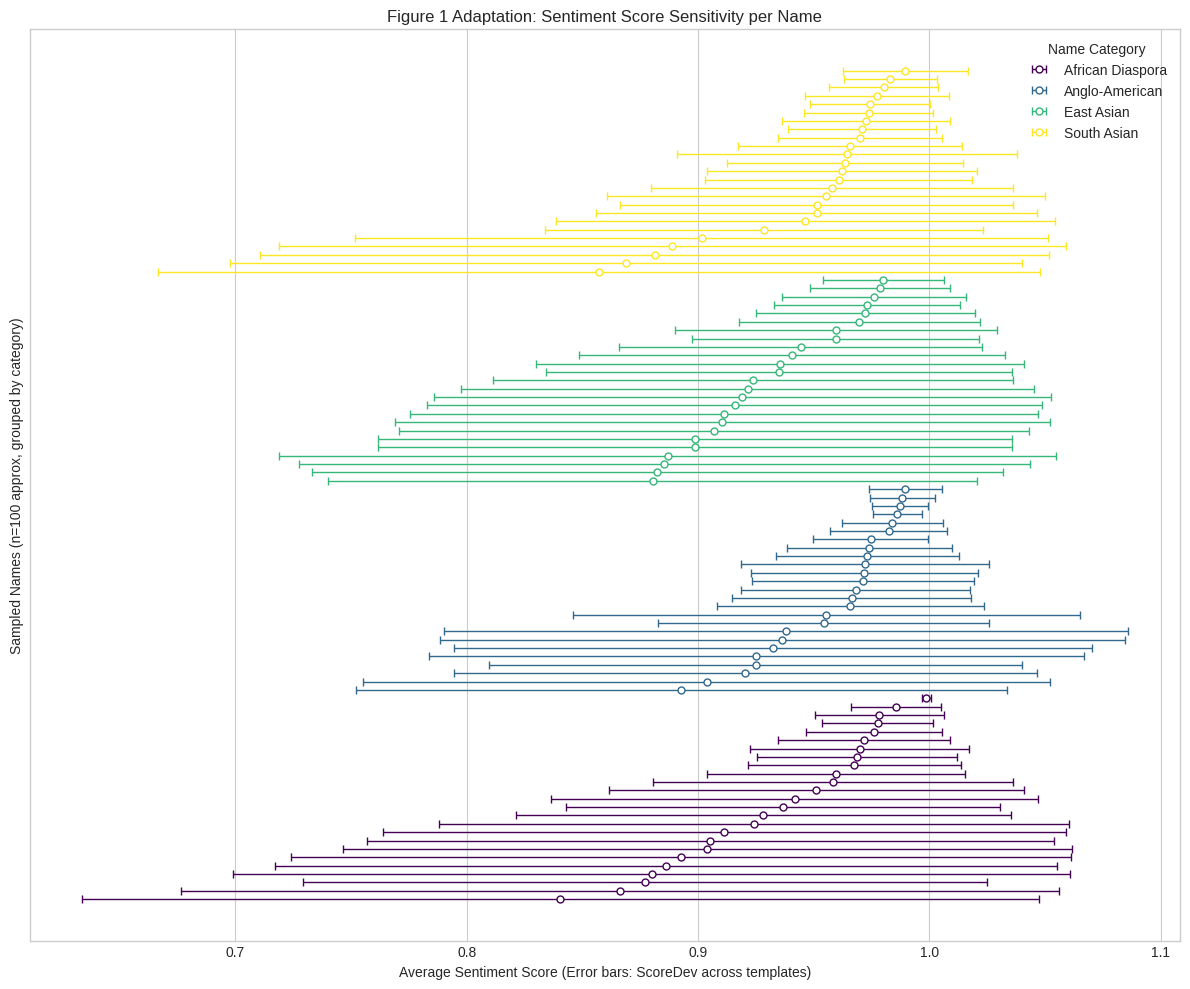

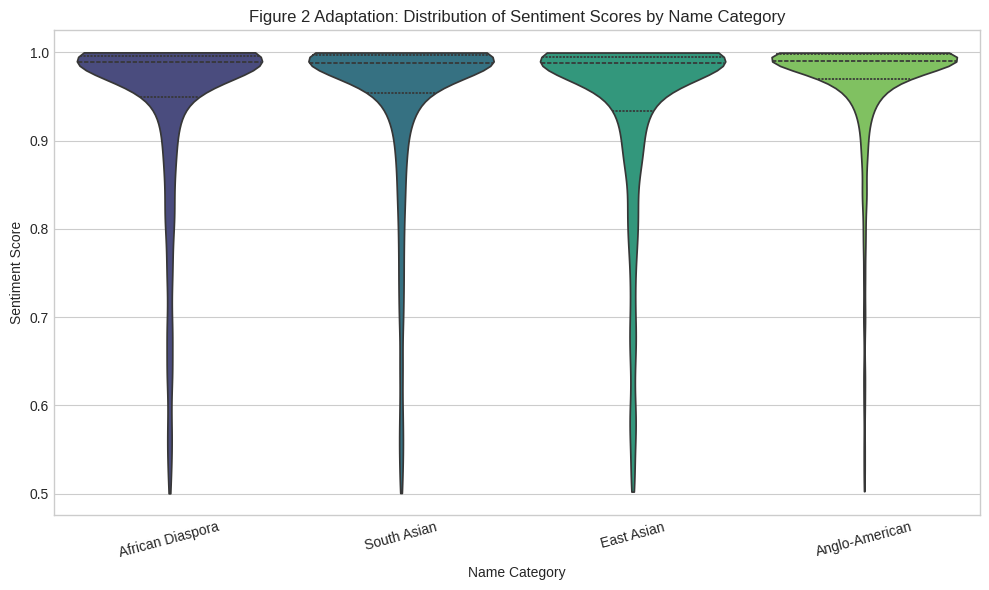

Error: The following summary variables are missing: numeric_summary, label_counts, label_percentages
Please ensure the previous code block (generating summaries) executed successfully.


In [ ]:
# === Code Block 3: Calculate Adapted Metrics and Create Visualizations ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'results_df' DataFrame from the previous summary step exists
if 'results_df' not in locals() or results_df.empty:
    print("Error: 'results_df' not found or is empty.")
    print("Please ensure the previous code blocks executed successfully.")
else:
    print("\n--- Calculating Adapted TextBias Metrics ---")

    # Filter out errors again if not already done
    valid_results_df = results_df[results_df['sentiment_label'] != 'ERROR'].copy()
    valid_results_df['sentiment_score'] = pd.to_numeric(valid_results_df['sentiment_score'])

    if len(valid_results_df) == 0:
         print("No valid results to calculate metrics on.")
    else:
        # 1. Calculate Average Score per Template
        template_avg_scores = valid_results_df.groupby('template_id')['sentiment_score'].mean().rename('avg_template_score')
        # print("\nAverage score per template:")
        # print(template_avg_scores) # Optional check

        # 2. Merge template average back to main df
        results_with_avg = pd.merge(valid_results_df, template_avg_scores, on='template_id', how='left')

        # 3. Calculate Score Difference from template average
        results_with_avg['score_diff'] = results_with_avg['sentiment_score'] - results_with_avg['avg_template_score']

        # 4. Calculate Metrics per Name
        # Group by category and name
        name_metrics = results_with_avg.groupby(['category', 'name']).agg(
            # Adapted ScoreSens: Avg difference from template mean score
            AdaptedScoreSens=('score_diff', 'mean'),
            # ScoreDev: Std Dev of scores for this name across templates
            ScoreDev=('sentiment_score', 'std'),
            # ScoreRange: Max-Min score for this name across templates
            min_score=('sentiment_score', 'min'),
            max_score=('sentiment_score', 'max'),
            # Also include the simple average score for the name
            avg_score=('sentiment_score', 'mean'),
            # Count templates used for this name (should be 10 if no errors)
            template_count=('template_id', 'count')
        ).reset_index()

        # Calculate ScoreRange explicitly
        name_metrics['ScoreRange'] = name_metrics['max_score'] - name_metrics['min_score']
        # Handle cases with only 1 template (std dev is NaN) -> fill with 0
        name_metrics['ScoreDev'] = name_metrics['ScoreDev'].fillna(0)

        # === Code Block 3: Calculate Adapted Metrics and Create Visualizations ===
# (Keep the initial part of the block: imports, checks, metric calculations)
# ... (previous code for metric calculation remains the same) ...

        print("\n--- Calculated Metrics Per Name (Sample) ---")
        print(name_metrics.head())

        # --- VISUALIZATIONS ---
        print("\n--- Generating Visualizations ---")
        plt.style.use('seaborn-v0_8-whitegrid') # Use a clean seaborn style

        # --- Figure 1 Adaptation: Point Plot of Name Sensitivity ---
        # Sample names for clarity (e.g., 25 per category)
        # Ensure sampling doesn't fail if a category has < 25 names
        n_sample = min(25, name_metrics['category'].value_counts().min())
        if n_sample < 1:
             print("Warning: Not enough data in at least one category to sample for plot.")
        else:
            sampled_names_df = name_metrics.groupby('category').sample(n=n_sample, random_state=42)
            # Sort for better visualization (optional, makes y-axis consistent if labels shown)
            sampled_names_df = sampled_names_df.sort_values(by=['category', 'avg_score'])

            plt.figure(figsize=(12, 10)) # Adjust figure size

            # Define colors using a colormap
            categories = name_metrics['category'].unique() # Get all unique categories
            colors = plt.cm.get_cmap('viridis', len(categories))
            category_colors = {category: colors(i) for i, category in enumerate(categories)}

            # Define y-positions based on the sorted sample
            y_positions = range(len(sampled_names_df))
            # Create a mapping from the DataFrame index to the y-position
            y_pos_map = {index: pos for pos, index in enumerate(sampled_names_df.index)}

            # --- Plot category by category ---
            for category, color in category_colors.items():
                # Filter the sampled data for the current category
                cat_df = sampled_names_df[sampled_names_df['category'] == category]

                if not cat_df.empty:
                    # Get the corresponding y-positions for this category's data points
                    cat_y = [y_pos_map[idx] for idx in cat_df.index]

                    plt.errorbar(x=cat_df['avg_score'], # Use avg score
                                 y=cat_y,
                                 xerr=cat_df['ScoreDev'], # Error bar = ScoreDev
                                 fmt='o',          # Plot points
                                 ecolor=color,     # Error bar color for this category
                                 color=color,      # Base color (used for marker edge here)
                                 mfc='white',      # Marker face color
                                 mew=1,            # Marker edge width
                                 markersize=5,
                                 linestyle='None', # No connecting line
                                 label=category,   # Label for automatic legend
                                 elinewidth=1,
                                 capsize=3)

            # Set y-ticks and labels (hide labels to avoid clutter)
            plt.yticks([],[])
            plt.ylabel(f"Sampled Names (n={n_sample * len(categories)} approx, grouped by category)")
            plt.xlabel("Average Sentiment Score (Error bars: ScoreDev across templates)")
            plt.title("Figure 1 Adaptation: Sentiment Score Sensitivity per Name")
            plt.legend(title="Name Category") # Add legend based on labels provided in loop
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()


            # --- Figure 2 Adaptation: Score Distribution per Category ---
            # (This part should be okay, but ensure valid_results_df is correct)
            plt.figure(figsize=(10, 6))
            sns.violinplot(data=valid_results_df, x='category', y='sentiment_score', palette='viridis', inner='quartile', cut=0)
            plt.xlabel("Name Category")
            plt.ylabel("Sentiment Score")
            plt.title("Figure 2 Adaptation: Distribution of Sentiment Scores by Name Category")
            plt.xticks(rotation=15)
            plt.tight_layout()
            plt.show()


Final bits of information

In [ ]:
# === Combined Block: Re-Calculate and Print Summaries ===

import pandas as pd

# --- Check for Input Data ---
# This block assumes the 'results' list from Code Block 2 exists.
if 'results' not in locals() or not results:
    print("Error: 'results' list not found or is empty.")
    print("Please ensure the Perturbation Experiment code block (Block 2) executed successfully and created the 'results' list.")
else:
    print("--- Re-Calculating and Printing Summary Information ---")

    # --- Re-Calculate Summaries ---
    # Convert the results list to a pandas DataFrame
    results_df = pd.DataFrame(results)

    # Filter out any rows where an error occurred during sentiment analysis
    # Also check if 'sentiment_score' exists before trying to convert/filter
    if 'sentiment_label' not in results_df.columns:
        print("Error: 'sentiment_label' column not found in results.")
        valid_results_df = pd.DataFrame() # Create empty df
    else:
        valid_results_df = results_df[results_df['sentiment_label'] != 'ERROR'].copy()
        if 'sentiment_score' in valid_results_df.columns:
             # Convert score to numeric, coercing errors (like None) to NaN
             valid_results_df['sentiment_score'] = pd.to_numeric(valid_results_df['sentiment_score'], errors='coerce')
             # Drop rows where score is NaN (meaning it was None or non-numeric originally)
             valid_results_df.dropna(subset=['sentiment_score'], inplace=True)
        else:
             print("Error: 'sentiment_score' column not found in results after filtering errors.")
             valid_results_df = pd.DataFrame() # Make empty

    print(f"Total valid results analyzed: {len(valid_results_df)}")

    if len(valid_results_df) == 0:
         print("No valid results to summarize.")
    else:
        # Define lists to store calculated summaries
        calculated_numeric_summary = None
        calculated_label_counts = None
        calculated_label_percentages = None

        # 1. Calculate Numerical Summaries
        try:
            # Check if 'category' and 'sentiment_score' exist before grouping
            if 'category' in valid_results_df.columns and 'sentiment_score' in valid_results_df.columns:
                calculated_numeric_summary = valid_results_df.groupby('category')['sentiment_score'].agg(
                    count='size',          # Number of valid results per category
                    mean_score='mean',     # Average sentiment score
                    median_score='median', # Median sentiment score
                    std_dev_score='std'    # Standard deviation of scores
                ).reset_index() # Reset index to make 'category' a column again
                print("\n1. Numerical Sentiment Score Summary per Category:")
                print(calculated_numeric_summary.to_string())
            else:
                print("Error: Missing 'category' or 'sentiment_score' column for numerical summary.")

        except Exception as e:
            print(f"\nError calculating numerical summary: {e}")

        # 2. Calculate Sentiment Label Distribution (Counts)
        try:
            # Check if 'category' and 'sentiment_label' exist
            if 'category' in valid_results_df.columns and 'sentiment_label' in valid_results_df.columns:
                calculated_label_counts = valid_results_df.groupby(['category', 'sentiment_label']).size().unstack(fill_value=0)
                print("\n\n2. Sentiment Label Counts per Category:")
                print(calculated_label_counts.to_string())

                # 3. Calculate Sentiment Label Distribution (Percentages)
                # Ensure calculated_label_counts is not empty before proceeding
                if not calculated_label_counts.empty:
                    calculated_label_percentages = calculated_label_counts.apply(lambda x: 100 * x / float(x.sum()) if x.sum() > 0 else 0, axis=1)
                    print("\n\n3. Sentiment Label Percentages per Category:")
                    print(calculated_label_percentages.round(2).to_string())
                else:
                    print("\nLabel counts table is empty, cannot calculate percentages.")
            else:
                print("Error: Missing 'category' or 'sentiment_label' column for label distribution.")

        except Exception as e:
             print(f"\nError calculating label distributions: {e}")

        print("\n--- End of Summary Information ---")
        print("Please copy the text output above starting from '--- Re-Calculating...'")

--- Re-Calculating and Printing Summary Information ---
Total valid results analyzed: 12000

1. Numerical Sentiment Score Summary per Category:
           category  count  mean_score  median_score  std_dev_score
0  African Diaspora   3000    0.941388      0.988501       0.104216
1    Anglo-American   3000    0.965583      0.989584       0.069449
2        East Asian   3000    0.936103      0.987503       0.107420
3       South Asian   3000    0.947587      0.988231       0.096639


2. Sentiment Label Counts per Category:
sentiment_label   NEGATIVE  POSITIVE
category                            
African Diaspora       826      2174
Anglo-American         629      2371
East Asian             768      2232
South Asian            748      2252


3. Sentiment Label Percentages per Category:
sentiment_label   NEGATIVE  POSITIVE
category                            
African Diaspora     27.53     72.47
Anglo-American       20.97     79.03
East Asian           25.60     74.40
South Asian         